In [1]:
import numpy as np
import pandas as pd
from IPython.display import Image

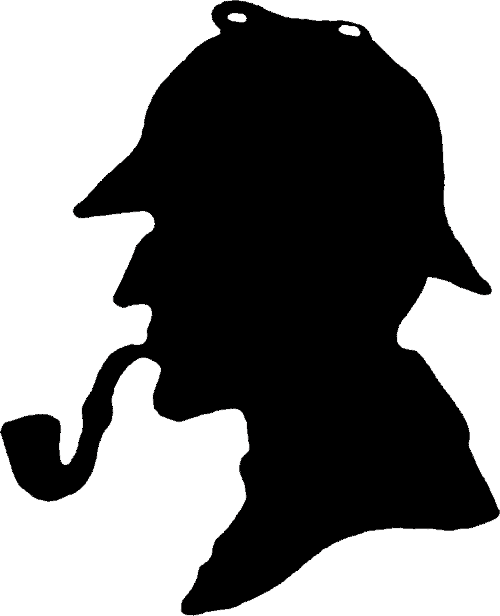

In [3]:
Image(filename='images/sherlock.gif', width='100px') 

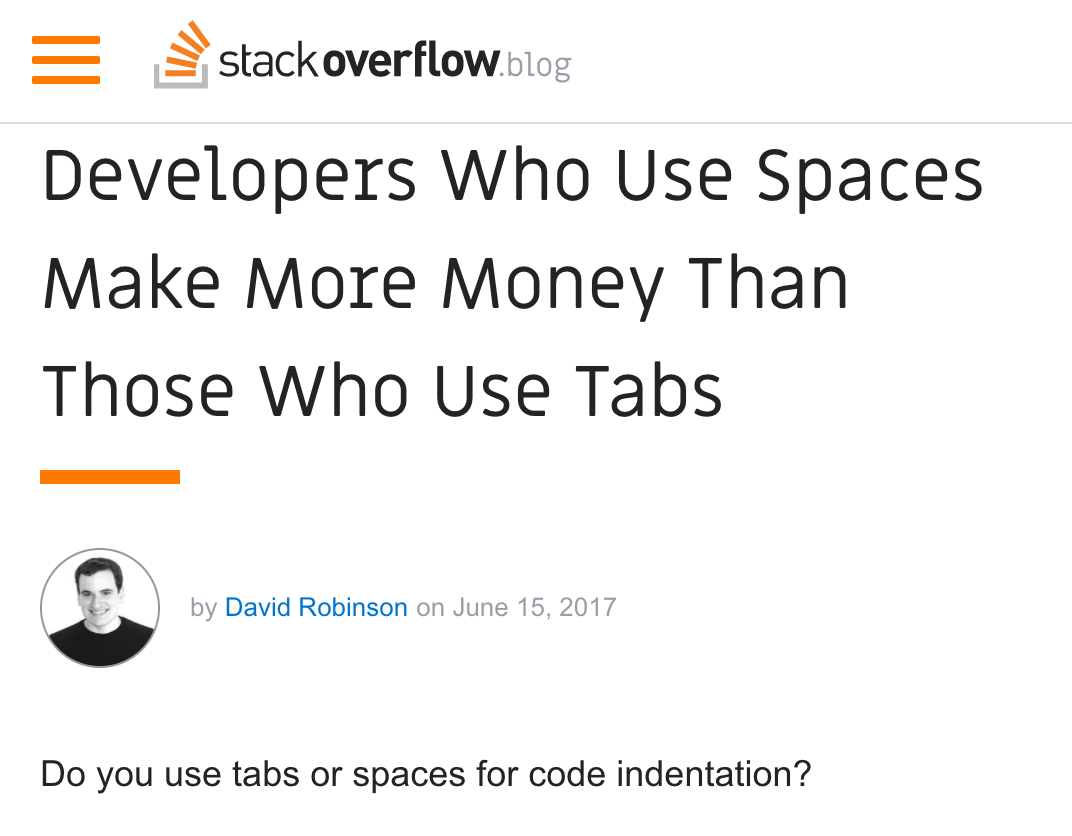

In [9]:
Image(filename='images/tabs-spaces-blog.png', width='300px')

In [10]:
survey_results = pd.read_csv('developer_survey_2017/survey_results_public.csv')

In [70]:
tab_space_survey = survey_results[survey_results['TabsSpaces'].notnull()]
df = tab_space_survey

I convert the `TabsSpaces` column to a categorical type.

In [71]:
from pandas.api.types import CategoricalDtype
t = CategoricalDtype(categories=['Tabs', 'Spaces', 'Both'], ordered=True)
# df['TabsSpaces'].dtype
df.loc[:,'TabsSpaces'] = df['TabsSpaces'].astype(t)

Now I use a regular expression to extract the actual number of job years from `YearsCodedJob`. I will then divide the numbers in three groups:

In [72]:
import re
pattern = re.compile(r'\d+')

def extract_years_coded(x):
    if not pd.isnull(x):
        m = pattern.findall(x)
        if m:
            return int(m[-1])
    return 0

df.loc[:, 'YearsCodedNumber'] = df['YearsCodedJob'].apply(extract_years_coded)

/Users/guido/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)


In [73]:
def to_years_coded_group(x):
    if x < 5:
        return '<= 5 years'
    if x <= 10:
        return '6-10'
    if x <= 15:
        return '11-15'
    return '15+'

df.loc[:, 'YearsCodedGroup'] = df['YearsCodedNumber'].apply(to_years_coded_group)

In [ ]:
# TODO reorder??

In [74]:
df['Country'].head()

0     United States
1    United Kingdom
2    United Kingdom
3     United States
5       New Zealand
Name: Country, dtype: object